# **IDS575: Machine Learning and Statistical Methods**
## [Quiz #02 - Linear Regression and Gradient Descent (PA)]



## Import Libraries
* See various conventions and acronyms.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

## Load the data
* Verify Python type for the dataset.

In [ ]:
HousingDataset = load_boston()
print(type(HousingDataset))
print(HousingDataset.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## Verify basic data statistics
* Count the number of features. (i.e., attributes)
* Count the number of examples. (i.e., instances and labels)
* Print out the description of each feature.

In [ ]:
def printBasicStats(dataset):
  print(dataset['feature_names'])
  print(len(dataset['feature_names']), type(dataset['feature_names']))  
  print(dataset['data'].shape, dataset['target'].shape)
  print(dataset['DESCR'])

printBasicStats(HousingDataset)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13 <class 'numpy.ndarray'>
(506, 13) (506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - R

## Convert the dataset to a DataFrame
*   Not necessarily useful. (scikit-learn works well with default libraries such as list, numpy array, and scipy's sparse matrix)
*   But using pandas provides more intuitive excel or R-like views.

In [ ]:
def getDataFrame(dataset):
  featureColumns = pd.DataFrame(dataset.data, columns=dataset.feature_names)
  targetColumn = pd.DataFrame(dataset.target, columns=['Target'])
  return featureColumns.join(targetColumn)

DataFrame = getDataFrame(HousingDataset)
print(DataFrame)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88    11.9

[50

## Data inspection
* See correlations between features.
* Check the quantiles with the highest-correlated feature.


In [ ]:
print(DataFrame.corr())
DataFrame[['RM', 'Target']].describe()

             CRIM        ZN     INDUS  ...         B     LSTAT    Target
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

,RM,Target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


## Data cleaning
* Target could have some outliers because the maximum price is almost doubled to 50.0 though 75% of the data less than 25.0. 
* We can remove excessively expensive houses.

In [ ]:
Df = DataFrame[DataFrame.Target < 22.5328 + 2*9.1971]
Df[['RM', 'Target']].describe()

,RM,Target
count,475.000000,475.000000
mean,6.195691,20.906526
std,0.594935,6.798844
min,3.561000,5.000000
25%,5.876500,16.500000
50%,6.167000,20.600000
75%,6.531500,24.300000
max,8.780000,39.800000


* Rescale the data (different from Gaussian regularization).


In [ ]:
def rescaleVector(x):
    min = x.min()
    max = x.max()
    return pd.Series([(element - min)/(max - min) for element in x])

x_rescale = rescaleVector(Df.RM)
y_rescale = rescaleVector(Df.Target)
print(x_rescale.min(), x_rescale.max())
print(y_rescale.min(), x_rescale.max())


0.0 1.0
0.0 1.0


* Plot the correlation between RM and Target.
* Observe the linear relationship (excluding some outliers).



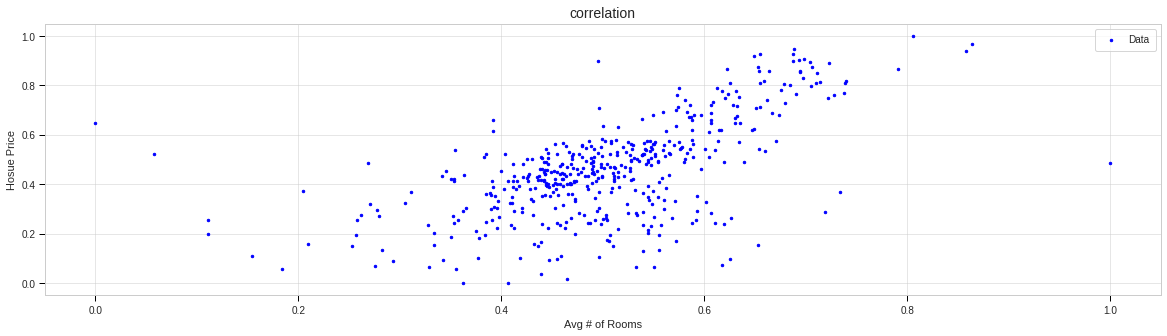

In [ ]:
def drawScatterAndLines(x, y, lines=[], titles={'main':None, 'x':None, 'y':None}):
  plt.figure(figsize=(20, 5))
  plt.rcParams['figure.dpi'] = 200
  plt.style.use('seaborn-whitegrid')
  plt.scatter(x, y, label='Data', c='blue', s=6)
  for (x_line, y_line) in lines:
    plt.plot(x_line, y_line, c='red', lw=3, label='Regression')
  plt.title(titles['main'], fontSize=14)
  plt.xlabel(titles['x'], fontSize=11)
  plt.ylabel(titles['y'], fontSize=11)
  plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
  plt.tick_params(direction='out', length=6, color='black', width=1, grid_alpha=.6)
  plt.show()

drawScatterAndLines(x_rescale, y_rescale, titles={'main':'correlation', 'x':'Avg # of Rooms', 'y':'Hosue Price'})


## Toy Linear Regression 
* Use only a single feature RM to fit house price.
* This could be called Simple Linear Regression.
* Plot the regression line.


training error = 0.0243


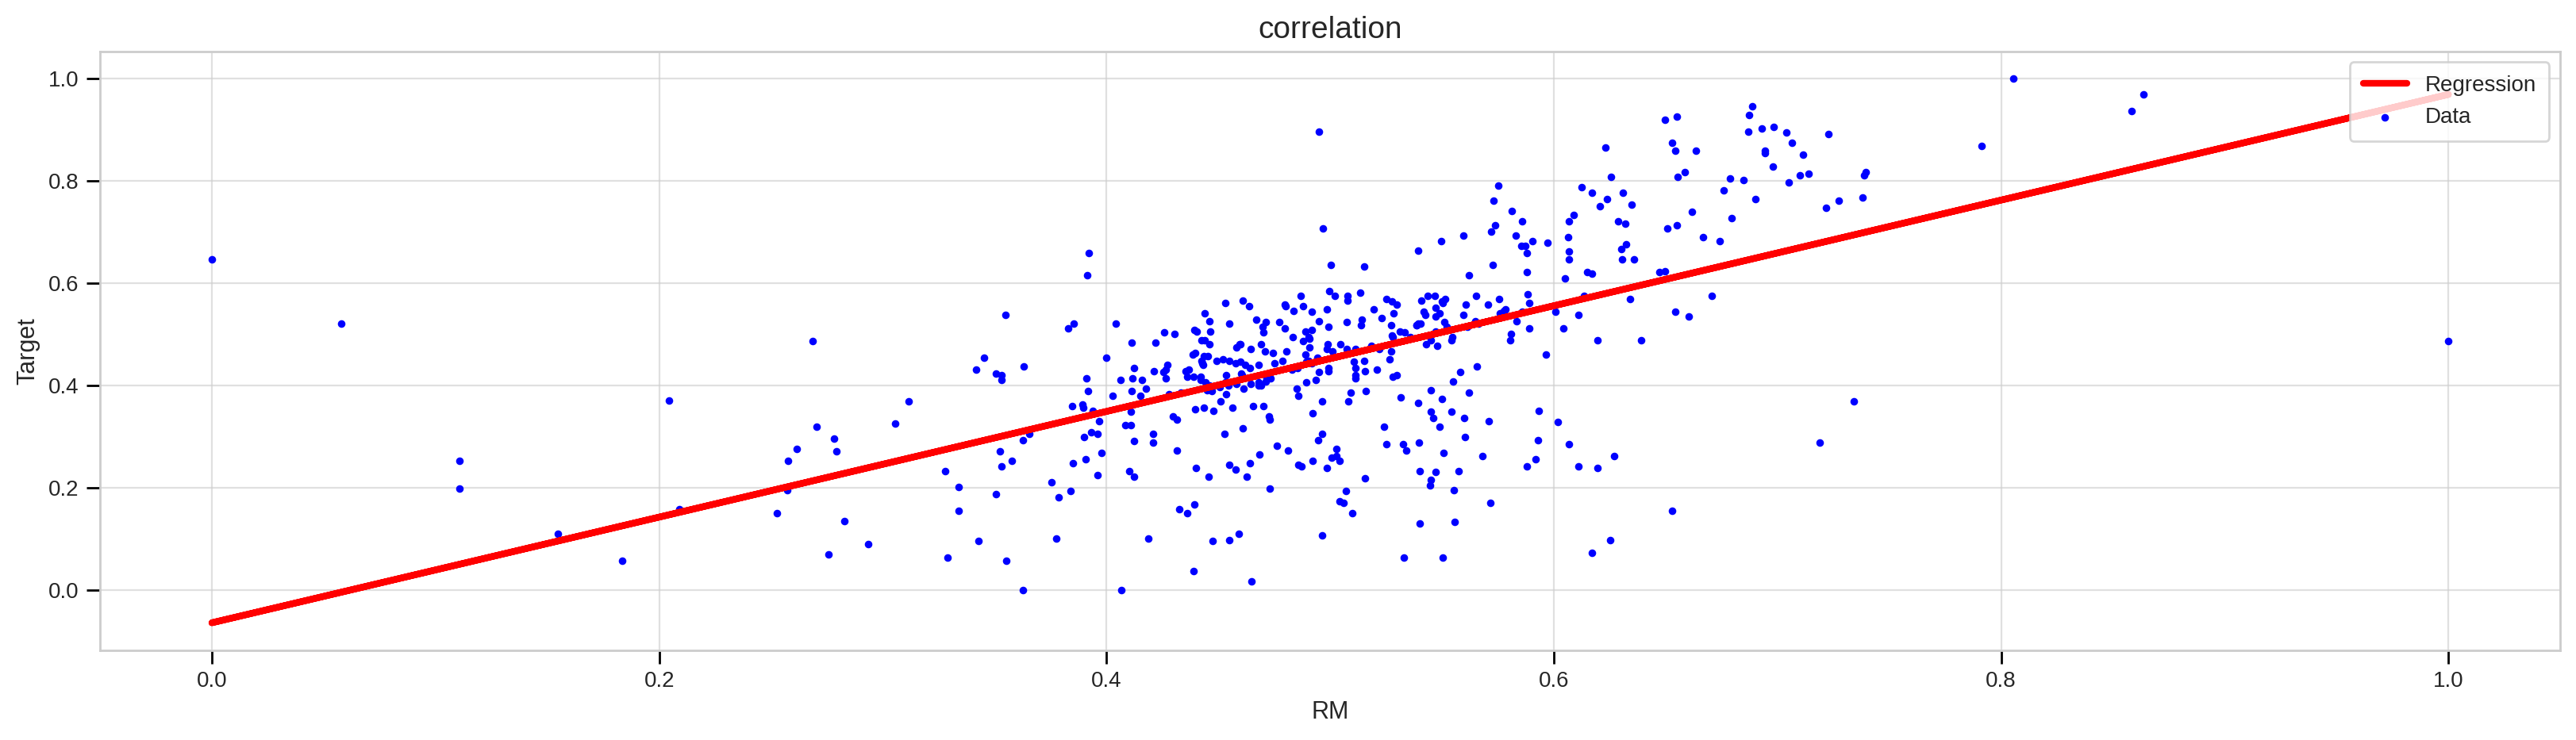

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def toyLinearRegression(df, feature_name, target_name):
  # This function performs a simple linear regression.
  # With a single feature (given by feature_name)
  # With a rescaling (for stability of test)
  x = rescaleVector(df[feature_name])
  y = rescaleVector(df[target_name])
  x_train = x.values.reshape(-1, 1)
  y_train = y.values.reshape(-1, 1)

  # Perform linear regression.
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  y_train_pred = lr.predict(x_train)
  
  # Return training error and (x_train, y_train, y_train_pred)
  return mean_squared_error(y_train, y_train_pred), (x_train, y_train, y_train_pred)

ToyTrainingError, (x_rescale_train, y_rescale_train, y_rescale_train_pred) = toyLinearRegression(Df, 'RM', 'Target')
print('training error = %.4f' % ToyTrainingError)
drawScatterAndLines(x_rescale_train, y_rescale_train, lines=[(x_rescale_train, y_rescale_train_pred)], titles={'main':'correlation', 'x':'RM', 'y':'Target'})


## Main Linear Regression 
* Use all of multi-variate features to fit house price.
* This could be called Multiple Linear Regression.

In [ ]:
from sklearn.model_selection import train_test_split
def splitTrainTest(df, size):
  X, y = df.drop('Target', axis=1), df.Target
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, test_size=X.shape[0] - size, random_state=0)
  return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = splitTrainTest(Df, 350)
LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.coef_)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)


[-1.06641863e-01  3.24481630e-02 -5.14185978e-02  9.52471575e-01
 -1.36897292e+01  2.26024467e+00 -1.78127076e-02 -1.14221362e+00
  2.37152228e-01 -1.12806444e-02 -7.28128370e-01  6.48138068e-03
 -3.93416391e-01]


## Measure training and test accuracy
* Use Mean Squared Error.

In [ ]:
from sklearn.metrics import mean_squared_error
print('Training error = %.4f' % mean_squared_error(y_train, y_train_pred))
print('Test error = %.4f' % mean_squared_error(y_test, y_test_pred))


Training error = 11.0620
Test error = 9.5406


# Programming Assignment (PA)
* Implement predict().
* Implement batchGradientDescent().
* Implement stocGradientDescent().
* Implement normalEquation().
* Play with testYourCode() that compares your implementations against scikit-learn's results. **Do not change alpha and epoch options separately provided to bgd and sgd for single-feature simple linear regression.**
* Once everything is done, then compare your implementations against scikit-learn's results using the entire features. **Now play with different alpha and epoch values, reporting your comparative impressions among bgd, sgd, and normal equations.**

In [ ]:
class MyLinearRegression:  
  theta = None

  def fit(self, X, y, option, alpha, epoch):
    X = np.concatenate((np.array(X), np.ones((X.shape[0], 1), dtype=np.float64)), axis=1)
    y = np.array(y)       
    if option.lower() in ['bgd', 'gd']:
      # Run batch gradient descent.
      self.theta = self.batchGradientDescent(X, y, alpha, epoch)      
    elif option.lower() in ['sgd']:
      # Run stochastic gradient descent.
      self.theta = self.stocGradientDescent(X, y, alpha, epoch)
    else:
      # Run solving the normal equation.      
      self.theta = self.normalEquation(X, y)
    
  def predict(self, X):
    X = np.concatenate((np.array(X), np.ones((X.shape[0], 1), dtype=np.float64)), axis=1)
    if isinstance(self.theta, np.ndarray):
      # TO-DO: ############################################# 
      
      ######################################################
      return y_pred
    return None

  def batchGradientDescent(self, X, y, alpha=0.00001, epoch=100000):
    (m, n) = X.shape      
    theta = np.zeros((n, 1), dtype=np.float64)
    for iter in range(epoch):
      if (iter % 1000) == 0:
        print('- currently at %d epoch...' % iter)    
      for j in range(n):
        # TO-DO: ############################################# 
                
        ######################################################
    return theta

  def stocGradientDescent(self, X, y, alpha=0.000001, epoch=10000):
    (m, n) = X.shape
    theta = np.zeros((n, 1), dtype=np.float64)
    for iter in range(epoch):
      if (iter % 100) == 0:
        print('- currently at %d epoch...' % iter)
      for i in range(m):
        for j in range(n):
          # TO-DO: ############################################# 
          
          ######################################################    
    return theta

  def normalEquation(self, X, y):
    # TO-DO: ############################################# 
    
    ######################################################
    return theta

  @staticmethod
  def toyLinearRegression(df, feature_name, target_name, option, alpha, epoch):
    # This function performs a simple linear regression.
    # With a single feature (given by feature_name)
    # With a rescaling (for stability of test)
    x = rescaleVector(df[feature_name])
    y = rescaleVector(df[target_name])
    x_train = x.values.reshape(-1, 1)
    y_train = y.values.reshape(-1, 1)

    # Perform linear regression.    
    lr = MyLinearRegression()
    lr.fit(x_train, y_train, option, alpha, epoch)
    y_train_pred = lr.predict(x_train)
    
    # Return training error and (x_train, y_train, y_train_pred)
    return mean_squared_error(y_train, y_train_pred), (x_train, y_train, y_train_pred)




- currently at 0 epoch...
- currently at 100 epoch...
- currently at 200 epoch...
- currently at 300 epoch...
- currently at 400 epoch...


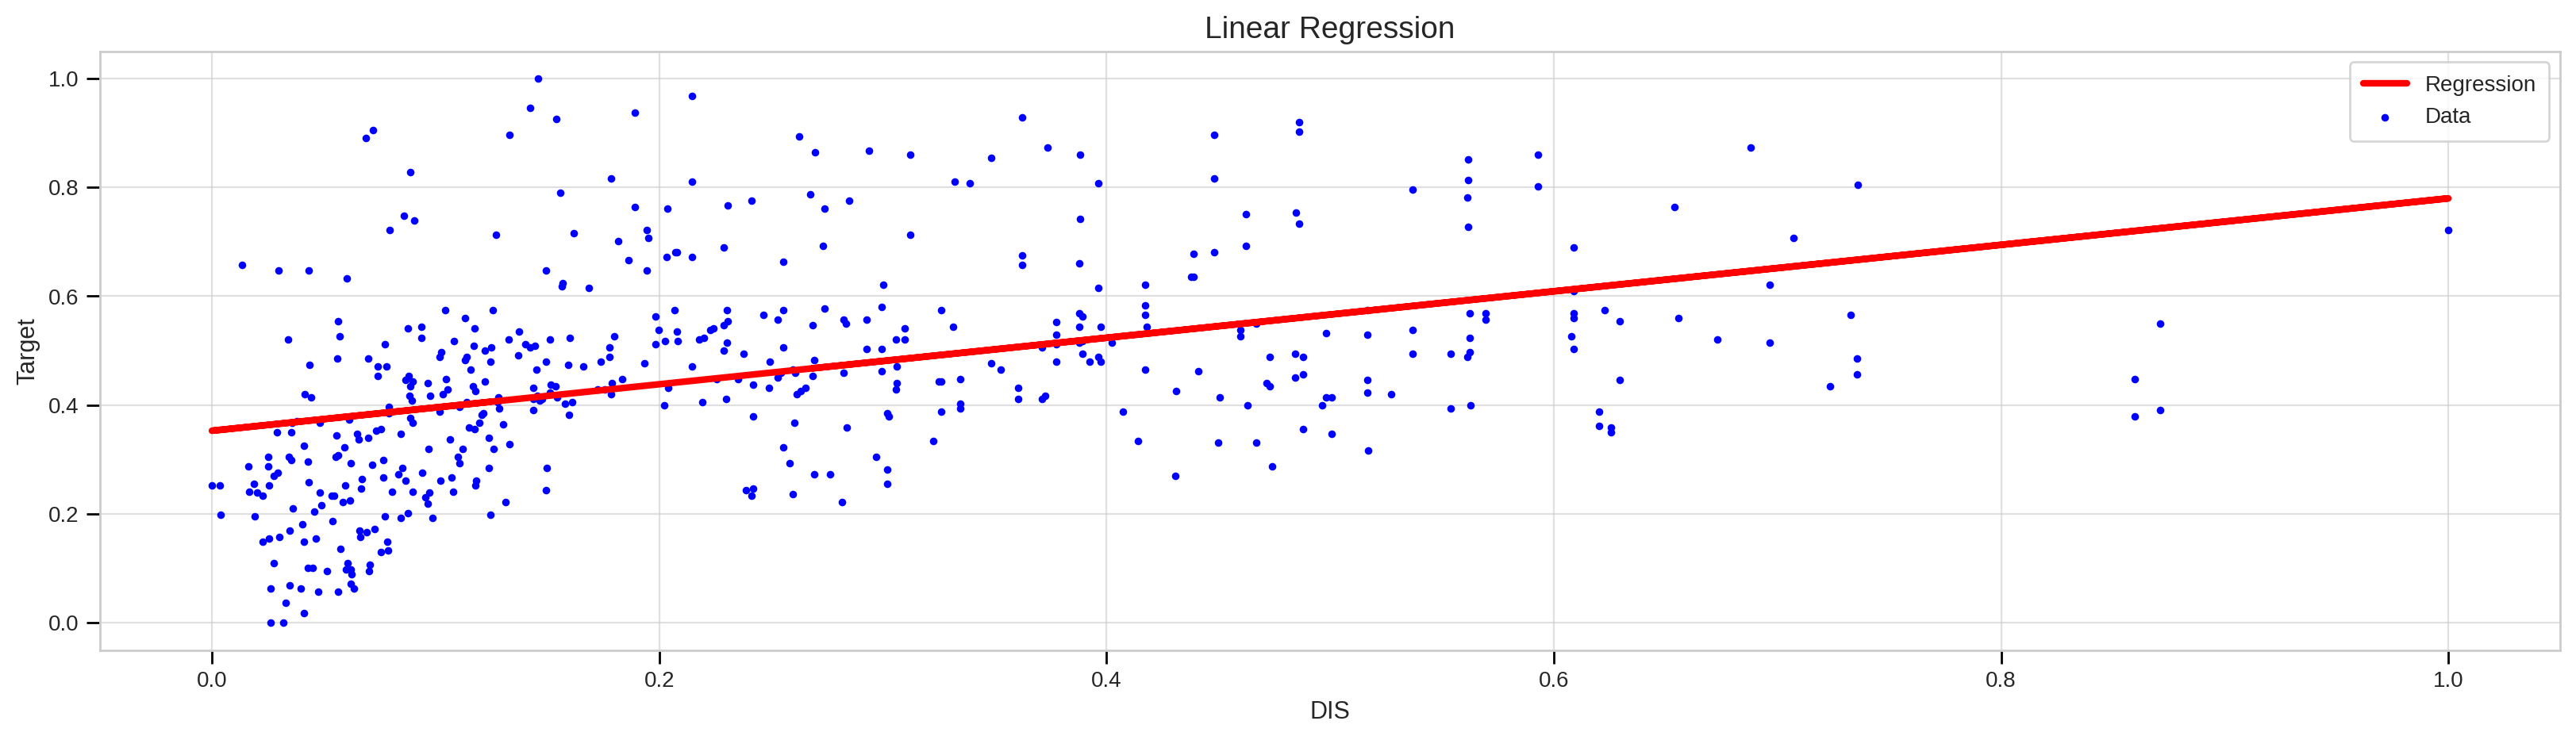

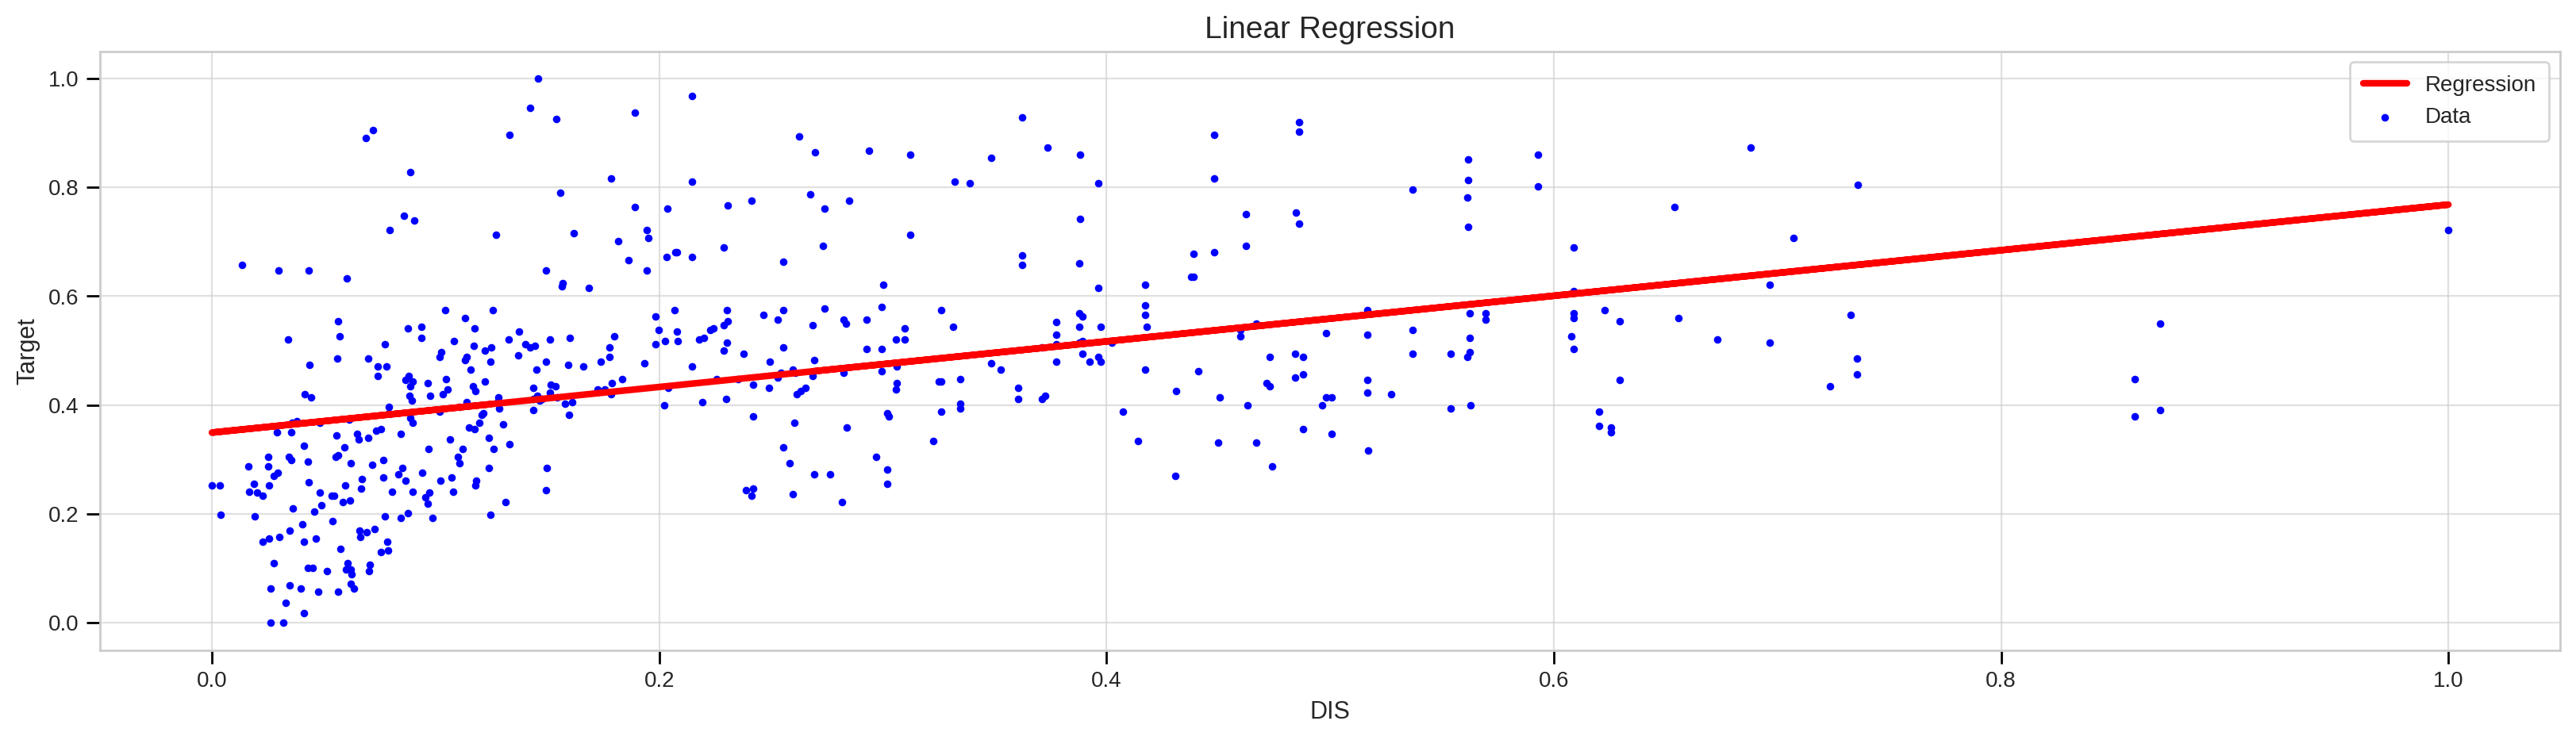

Scikit's training error = 0.031344 / My training error = 0.031375 --> Difference = 0.0000
- currently at 0 epoch...
- currently at 1000 epoch...
- currently at 2000 epoch...
- currently at 3000 epoch...
- currently at 4000 epoch...


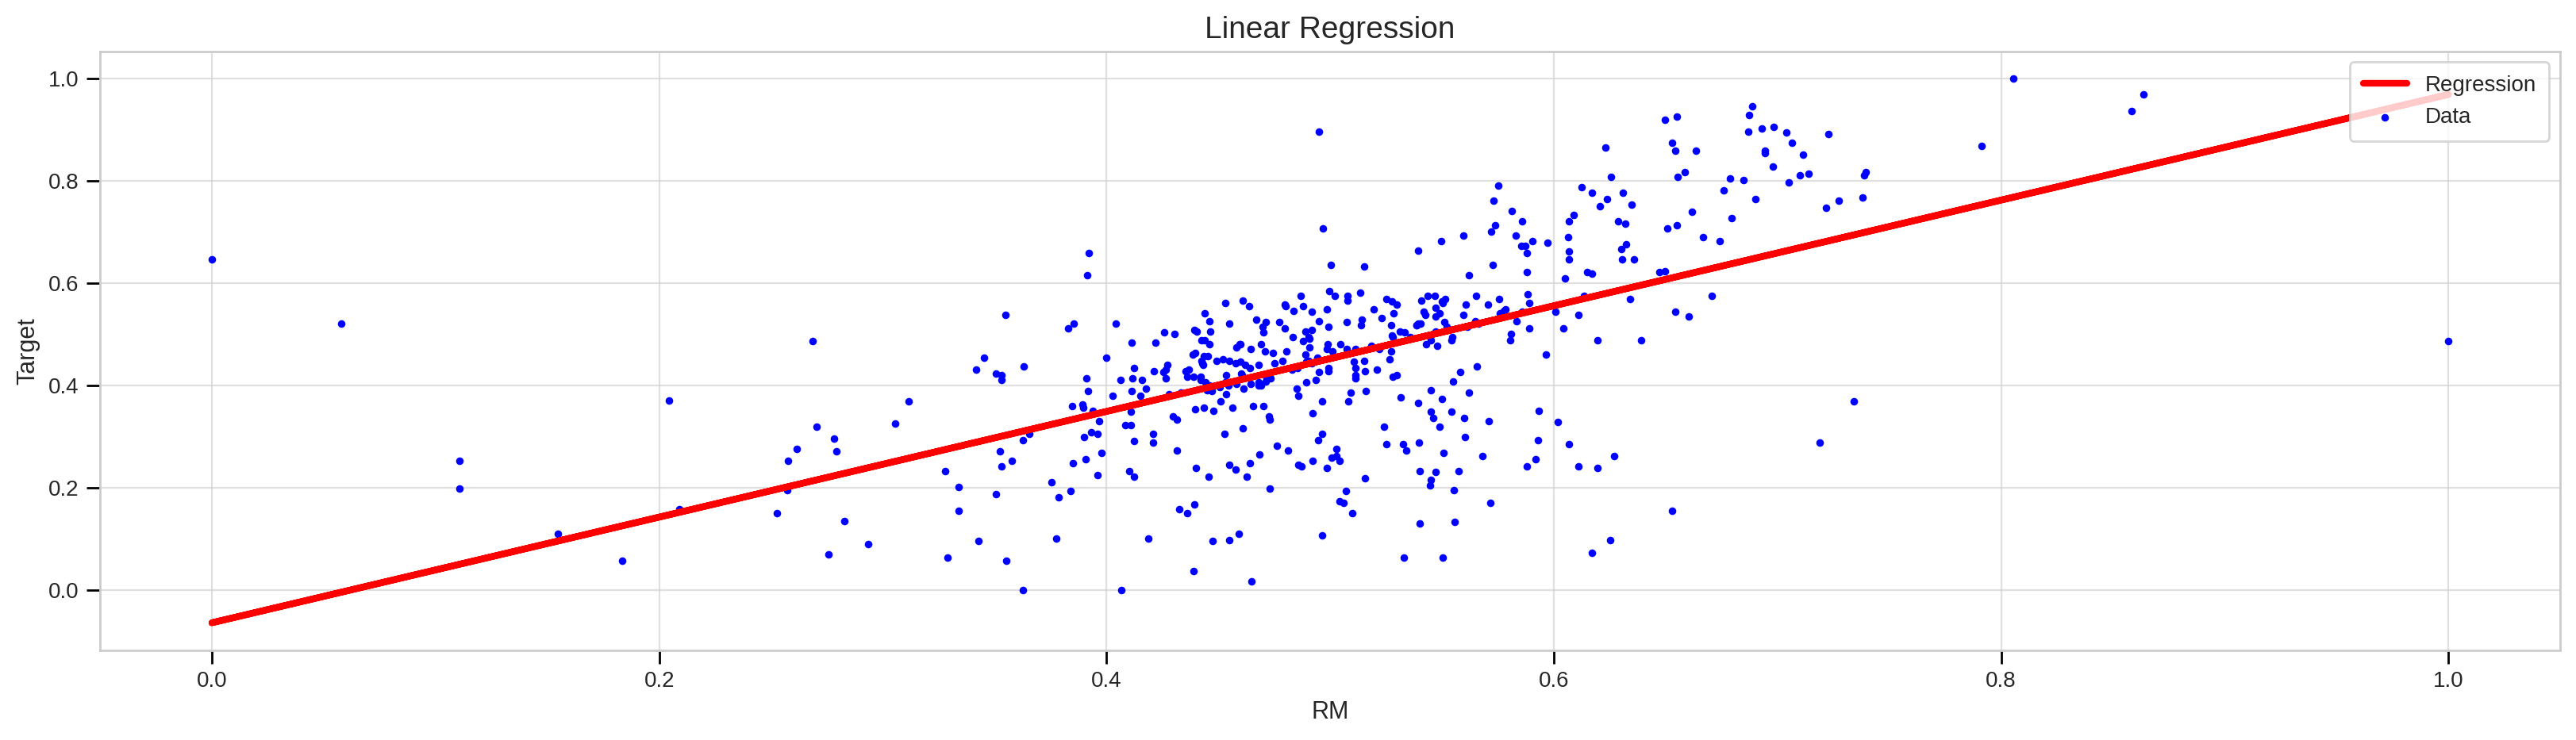

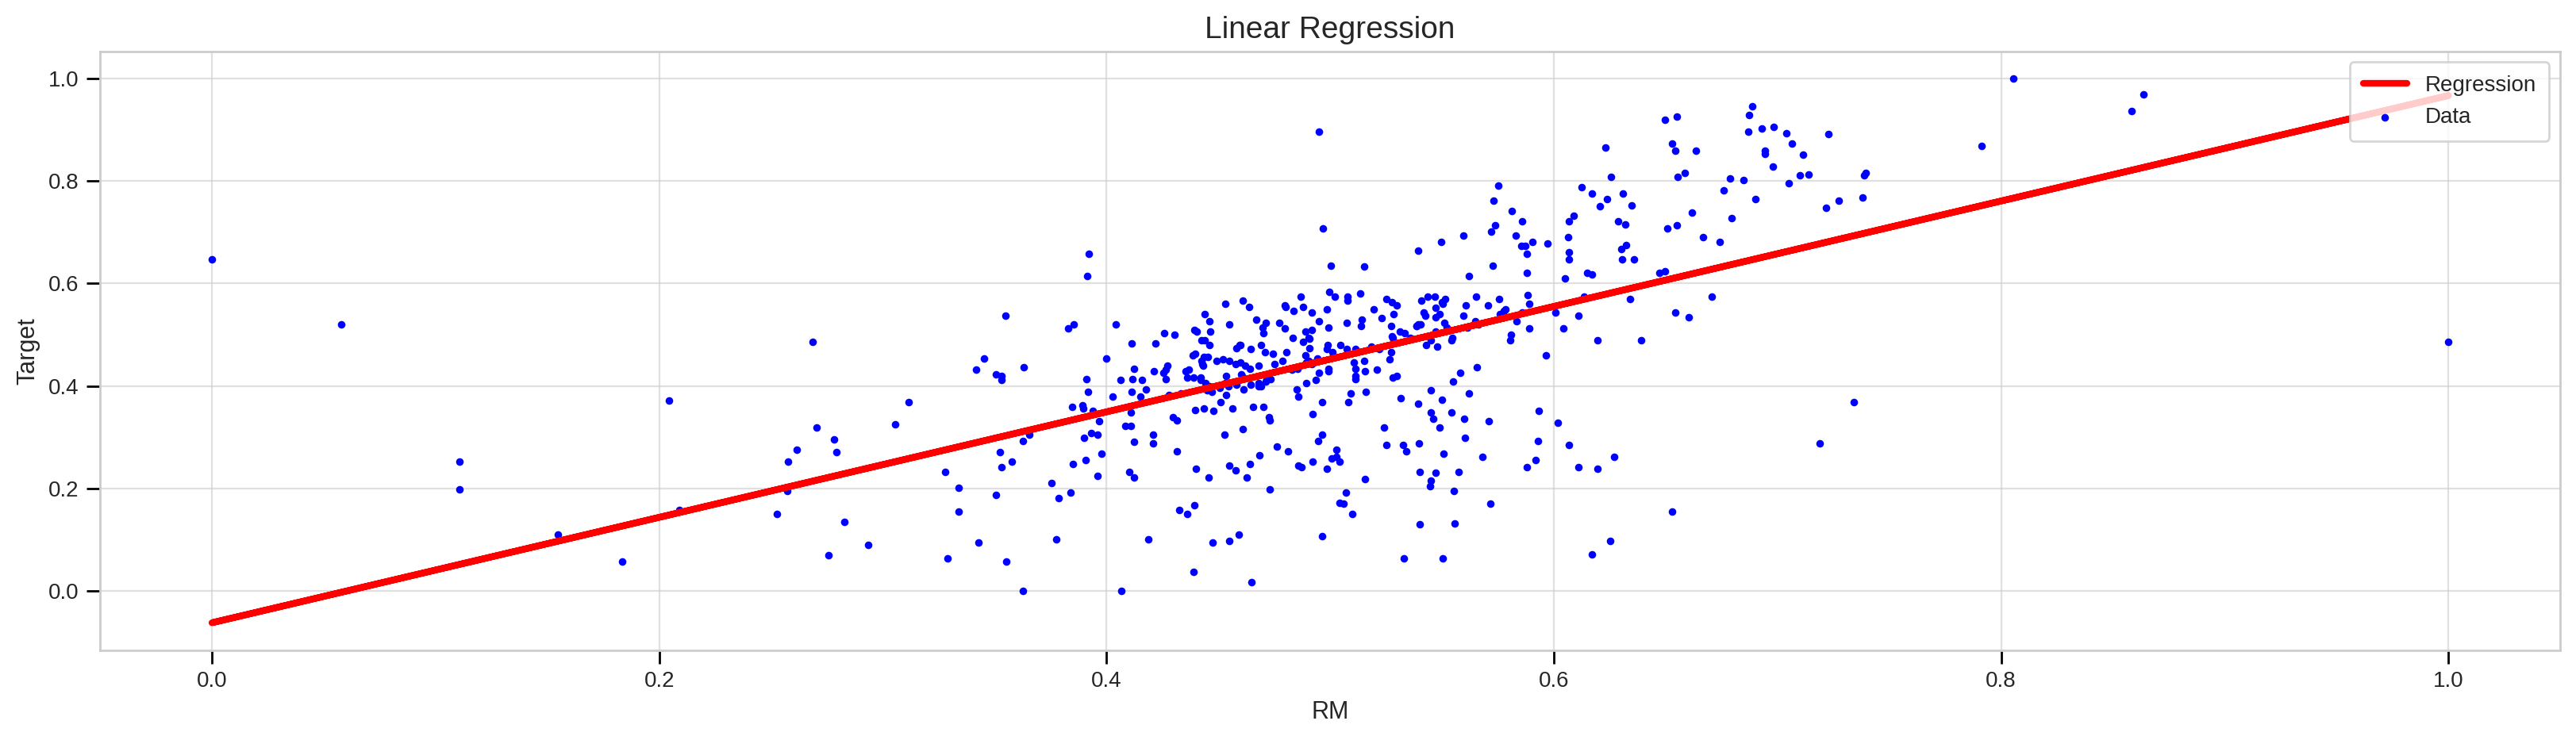

Scikit's training error = 0.024251 / My training error = 0.024251 --> Difference = 0.0000


In [ ]:
def testYourCode(df, feature_name, target_name, option, alpha, epoch):
  trainError0, (x_train0, y_train0, y_train_pred0) = toyLinearRegression(df, feature_name, target_name)
  trainError1, (x_train1, y_train1, y_train_pred1) = MyLinearRegression.toyLinearRegression(df, feature_name, target_name, option, alpha, epoch)
  drawScatterAndLines(x_train0, y_train0, lines=[(x_train0, y_train_pred0)], titles={'main':'Linear Regression', 'x':feature_name, 'y':target_name})
  drawScatterAndLines(x_train1, y_train1, lines=[(x_train1, y_train_pred1)], titles={'main':'Linear Regression', 'x':feature_name, 'y':target_name})
  return trainError0, trainError1

TrainError0, TrainError1 = testYourCode(Df, 'DIS', 'Target', option='sgd', alpha=0.001, epoch=500)
print("Scikit's training error = %.6f / My training error = %.6f --> Difference = %.4f" % (TrainError0, TrainError1, np.abs(TrainError0 - TrainError1)))
TrainError0, TrainError1 = testYourCode(Df, 'RM', 'Target', option='bgd', alpha=0.1, epoch=5000)
print("Scikit's training error = %.6f / My training error = %.6f --> Difference = %.4f" % (TrainError0, TrainError1, np.abs(TrainError0 - TrainError1)))


In [ ]:
MyLR = MyLinearRegression()
MyLR.fit(X_train, y_train.values.reshape(-1, 1), option='sgd', alpha=0.000001, epoch=10000)
print(MyLR.theta)
y_train_pred = MyLR.predict(X_train)
y_test_pred = MyLR.predict(X_test)

print('Training error = %.4f' % mean_squared_error(y_train, y_train_pred))
print('Test error = %.4f' % mean_squared_error(y_test, y_test_pred))

- currently at 0 epoch...
- currently at 100 epoch...
- currently at 200 epoch...
- currently at 300 epoch...
- currently at 400 epoch...
- currently at 500 epoch...
- currently at 600 epoch...
- currently at 700 epoch...
- currently at 800 epoch...
- currently at 900 epoch...
- currently at 1000 epoch...
- currently at 1100 epoch...
- currently at 1200 epoch...
- currently at 1300 epoch...
- currently at 1400 epoch...
- currently at 1500 epoch...
- currently at 1600 epoch...
- currently at 1700 epoch...
- currently at 1800 epoch...
- currently at 1900 epoch...
- currently at 2000 epoch...
- currently at 2100 epoch...
- currently at 2200 epoch...
- currently at 2300 epoch...
- currently at 2400 epoch...
- currently at 2500 epoch...
- currently at 2600 epoch...
- currently at 2700 epoch...
- currently at 2800 epoch...
- currently at 2900 epoch...
- currently at 3000 epoch...
- currently at 3100 epoch...
- currently at 3200 epoch...
- currently at 3300 epoch...
- currently at 3400 epoch.